Goal: to determine the precursor lines, if any, of a 1d CA given a rule.

Tests a variety of algorithms for determining previous line with the hopes of identifying a relatively quick
algorithm that is better than the brute force method (O(n) = 2^n)

In [96]:
from matplotlib import pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import random
import time
import itertools

#Generates a random list of 1's and 0's of length n
n = 10
test_line = [None]*n
for i in range(n):
    test_line[i] = random.choice([0,1])

#Cellular Automata rule
test_rule = [1,1,0,0,1,1,0,0]

#Rules for Reference/Testing
#Inverting Rule (51): [1,1,0,0,1,1,0,0]
#Rule 30: [0, 0, 0, 1, 1, 1, 0]
#Rule 102: [0, 1, 1, 0, 0, 1, 1, 0]

In [53]:
################### Helper Methods ######################
def arrToInt(n):
    '''
        Parameter: n - an array containing only 1's and 0's as its elements.
        Returns: the integer representation of the array as a binary number.
    '''
    result = 0
    for power, i in enumerate(n):
        result += i * 2**((len(n)-1-power))
    return result

def intToArr(a):
    '''
        Parameter: n - an arbitrary integer.
        Returns: The list representation of n as a binary number
    '''
    b = bin(a)[2:]
    return [int(i) for i in b]

def getNext(three, bin_rule):
    '''
        Parameter:  three - a list of 3 elements containing only 1's and 0's, i.e. a 'neighbor set' of three cells.
                    bin_rule - A valid Cellular Automata rule.
        Returns: The given CA rule applied to the three cells.
    '''
    if(len(three) != 3): print("Error getNext() - must be array of length 3")
    return bin_rule[arrToInt(three)]

def iterateOnce(line, bin_rule):
    '''
        Parameter:  line - a list containing only 1's and 0's, i.e. a row of cells
                    bin_rule - A valid Cellular Automata rule.
        Returns: The given CA rule applied to the line.
    '''
    result = [None]*len(line)
    result[-1] = getNext([line[-2],line[-1],line[0]], bin_rule)
    for i in range(len(line)-1):
        result[i] = getNext([line[i-1],line[i],line[i+1]], bin_rule)
    return result

def gen_test_line(n):
    '''
        Parameter:  n - any positive integer.
        Returns: A random list of 1's and 0's of length n
    '''
    result = [None]*n
    for i in range(n):
        result[i] = random.choice([0,1])
    return result

In [98]:
######################### Timing #########################
def getTime(function, line=test_line, startAt=3):
    '''
        Parameter:  function - A backtracking algorithm 
                    line - a valid line of cells.
                    startAt - the length of 'line' to begin timing at.
        Returns: A set of times for estimation of order
    '''
    length = len(line)-startAt
    y = [None]*(length)
    x = [i for i in range(length)]

    for i in range(startAt, len(line)):    
        temp_line = line[:i]
        t1 = time.time()
        function(temp_line, test_rule)
        t2 = round(time.time() - t1, 5)*1000
        y[i - startAt] = t2
    return (x,y)

In [99]:
################### Brute Force Method ######################
'''
    See paper for a full description of this algorithm.
'''
#O(n) = 2^n
def brute_force_method(line, bin_rule):
    result = []
    for i in range(2**len(line)):
        k = ([0]*(len(line)-len(intToArr(i)))) + intToArr(i)
        if(iterateOnce(k, bin_rule) == line):
           result.append(k)
    return result

In [100]:
#Times the brute force method
len_of_line=20
xy = getTime(brute_force_method,line=gen_test_line(len_of_line))

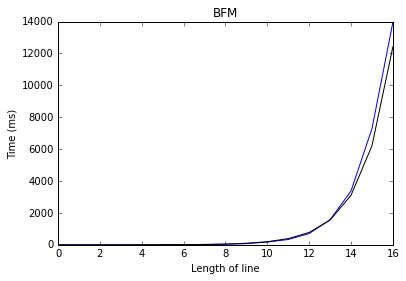

In [101]:
f_x = np.linspace(0,len_of_line-4,len_of_line-3)
f = lambda x: round(2**(x-2.4),4)
f_y = [f(x) for x in range(len_of_line-3)]
plt.xlabel("Length of line")
plt.ylabel("Time (ms)")
plt.title('BFM')
plt.plot(xy[0], xy[1], c='blue')
plt.plot(f_x, f_y, c='black')

In [102]:
################### Square Subintervals Algorithm ######################
'''
    See paper for a full description of this algorithm.
'''
#O(n) = 2^(sqrt(n))
def square_subintervals_algorithm(line, bin_rule): #line must be at least 5 in length

    if(len(line) <= 6):
        splits = [line]
    else:
        split_interval = int(np.ceil(np.sqrt(len(line))))
        splits = [line[i:i+split_interval] for i in range(0, len(line)-1, split_interval)]
        if(len(splits[-1]) < 3):
            splits[-2] = splits[-2] + splits[-1]
            del splits[-1]
            half = int(len(splits[-1])/2)
            a = splits[-1][:half]
            b = splits[-1][len(splits[-1])-half:]
            splits[-1] = a
            splits.append(b)
    combinations = [None]*(len(splits))
    for i, k in enumerate(splits):
        combinations[i] = brute_force_method(k, bin_rule)
        if combinations[i] == []:
            return []

    x = [join(a) for a in list(itertools.product(*combinations))]
    result = []
    for element in x:
        if iterateOnce(element, bin_rule) == line:
            result.append(element)
    return result

#helper function
def join(arr):
    result = []
    for i in arr:
        result += i
    return result

In [103]:
#Times the square subintervals algorithm
len_of_line = 100
line = gen_test_line(len_of_line)
print(line)
xy = getTime(square_subintervals_algorithm, line)

[0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0]


C:\Users\dmale\AppData\Local\Temp/ipykernel_16024/2484438276.py:2: RuntimeWarning: invalid value encountered in sqrt
  f = lambda x: round(2**np.sqrt(x-40),4)


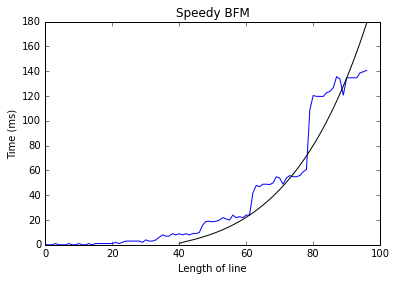

In [104]:
f_x = np.linspace(0,len_of_line-4,len_of_line-3)
f = lambda x: round(2**np.sqrt(x-40),4)
f_y = [f(x) for x in range(len_of_line-3)]
plt.xlabel("Length of line")
plt.ylabel("Time (ms)")
plt.title('Speedy BFM')
plt.plot(xy[0],xy[1], c='blue')
plt.plot(f_x,f_y,c='black')